In [1]:
import psycopg2 as ps
import pandas as pd
from sqlalchemy import create_engine
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [2]:

conn = ps.connect(database='admission_predict_db',
                        user='postgres', password='88042425', 
                        host='127.0.0.1', port='5432'
)
  
cursor = conn.cursor()
print("Connected!")

Connected!


In [3]:
sql = '''select * from Admission_Predict;'''
cursor.execute(sql)
for i in cursor.fetchall():
    print(i)

('1', '337', '118', '4', '4.5', '4.5', '9.65', '1', '0.92')
('2', '324', '107', '4', '4', '4.5', '8.87', '1', '0.76')
('3', '316', '104', '3', '3', '3.5', '8', '1', '0.72')
('4', '322', '110', '3', '3.5', '2.5', '8.67', '1', '0.8')
('5', '314', '103', '2', '2', '3', '8.21', '0', '0.65')
('6', '330', '115', '5', '4.5', '3', '9.34', '1', '0.9')
('7', '321', '109', '3', '3', '4', '8.2', '1', '0.75')
('8', '308', '101', '2', '3', '4', '7.9', '0', '0.68')
('9', '302', '102', '1', '2', '1.5', '8', '0', '0.5')
('10', '323', '108', '3', '3.5', '3', '8.6', '0', '0.45')
('11', '325', '106', '3', '3.5', '4', '8.4', '1', '0.52')
('12', '327', '111', '4', '4', '4.5', '9', '1', '0.84')
('13', '328', '112', '4', '4', '4.5', '9.1', '1', '0.78')
('14', '307', '109', '3', '4', '3', '8', '1', '0.62')
('15', '311', '104', '3', '3.5', '2', '8.2', '1', '0.61')
('16', '314', '105', '3', '3.5', '2.5', '8.3', '0', '0.54')
('17', '317', '107', '3', '4', '3', '8.7', '0', '0.66')
('18', '319', '106', '3', '4', '3

In [4]:
#create a dataframe from the data in the table with sql query
df = pd.read_sql_query('''SELECT * FROM Admission_Predict''', con=conn)
df

C:\Users\16476\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4,4.5,8.87,1,0.76
2,3,316,104,3,3,3.5,8,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.8
4,5,314,103,2,2,3,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4,9.02,1,0.87
496,497,337,117,5,5,5,9.87,1,0.96
497,498,330,120,5,4.5,5,9.56,1,0.93
498,499,312,103,4,4,5,8.43,0,0.73


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df['Serial No.']=df['Serial No.'].astype(int)
df['GRE Score']=df['GRE Score'].astype(int)
df['TOEFL Score']=df['TOEFL Score'].astype(int)
df['University Rating']=df['University Rating'].astype(int)
df['SOP']=df['SOP'].astype(float)
df['LOR ']=df['LOR '].astype(float)
df['CGPA']=df['CGPA'].astype(float)
df['Research']=df['Research'].astype(int)
df['Chance of Admit ']=df['Chance of Admit '].astype(float)

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20,random_state=42)
print(type(y_train))

<class 'numpy.ndarray'>


In [9]:
ly_train=np.array([1 if chance > 0.80 else 0 for chance in y_train])
# ly_train=np.array(ly_train)

ly_test=np.array([1 if chance > 0.80 else 0 for chance in y_test])
# ly_test=np.array(ly_test)

In [10]:

LR = LogisticRegression()
LR.fit(X_train, ly_train)

ly = LR.predict(X_test)
ly


C:\Users\16476\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

Logistic regression accuracy: 92.00 %
The classification report of the Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.83      0.89      0.86        27

    accuracy                           0.92       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.92      0.92      0.92       100



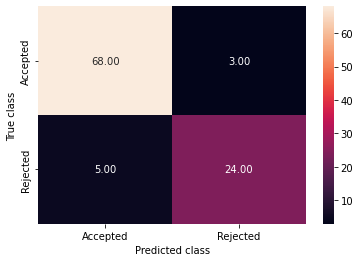

In [11]:
print('Logistic regression accuracy: {:.2f}'.format(accuracy_score(ly_test, ly)*100),"%")

print("The classification report of the Logistic Regression:\n",classification_report(ly_test, ly))

#confusion matrix
lr_confusion_matrix = confusion_matrix(ly, ly_test)
sns.heatmap(lr_confusion_matrix, annot=True, fmt='.2f',xticklabels = ["Accepted", "Rejected"] , yticklabels = ["Accepted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [13]:
#an unknown case 
LR.predict([[600,300,120,5,4,4,8,1]])

array([1])